# Плотное векторное представление слов для определения тональности текста отзывов на фильмы из IMDb (Internet Movie Database) 

Учебный курс "[Нейросети для анализа текстов](https://www.asozykin.ru/courses/nnpython)".

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
# работа с обратной связью от обучающейся нейронной сети
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dl-urfu-imdb/train.npy
/kaggle/input/dl-urfu-imdb/train_label.npy
/kaggle/input/dl-urfu-imdb/sample_supmission.csv
/kaggle/input/dl-urfu-imdb/test.npy


Загружаем данные

In [2]:
KAGGLE_PATH = '/kaggle/input/dl-urfu-imdb/'
x_train = np.load(KAGGLE_PATH + 'train.npy', allow_pickle=True)
y_train = np.load(KAGGLE_PATH + 'train_label.npy', allow_pickle=True)
x_test = np.load(KAGGLE_PATH + 'test.npy', allow_pickle=True)
x_train.shape, y_train.shape, x_test.shape, 

((46000,), (46000,), (4000,))

## Подготовка данных для обучения

In [3]:
max_words = 10_000
maxlen = 250
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post')

## Создание нейронной сети

In [4]:
model = Sequential()
model.add(Embedding(max_words, 7, input_length=maxlen))
model.add(Dropout(0.8))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [5]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

## Обучаем нейронную сеть

In [6]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=15,
                    batch_size=198,
                    validation_split=0.1)

Epoch 1/15
210/210 [==============================] - 3s 7ms/step - loss: 0.6921 - accuracy: 0.5181 - val_loss: 0.6598 - val_accuracy: 0.6998
Epoch 2/15
210/210 [==============================] - 1s 4ms/step - loss: 0.6118 - accuracy: 0.7092 - val_loss: 0.4372 - val_accuracy: 0.8496
Epoch 3/15
210/210 [==============================] - 1s 4ms/step - loss: 0.4267 - accuracy: 0.8223 - val_loss: 0.3380 - val_accuracy: 0.8778
Epoch 4/15
210/210 [==============================] - 1s 4ms/step - loss: 0.3534 - accuracy: 0.8544 - val_loss: 0.3018 - val_accuracy: 0.8889
Epoch 5/15
210/210 [==============================] - 1s 4ms/step - loss: 0.3192 - accuracy: 0.8711 - val_loss: 0.2815 - val_accuracy: 0.8939
Epoch 6/15
210/210 [==============================] - 1s 4ms/step - loss: 0.3007 - accuracy: 0.8757 - val_loss: 0.2695 - val_accuracy: 0.8985
Epoch 7/15
210/210 [==============================] - 1s 4ms/step - loss: 0.2908 - accuracy: 0.8805 - val_loss: 0.2630 - val_accuracy: 0.8996
Epoch 

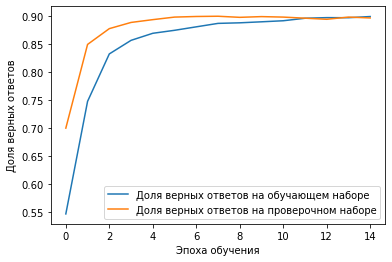

In [7]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Готовим данные для LeaderBoard

In [8]:
sample_submission = pd.read_csv(KAGGLE_PATH + 'sample_supmission.csv', index_col='id')
sample_submission.label = model.predict_classes(x_test)
sample_submission.to_csv("sample_submission.csv")

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
